In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import astropy.units as uni
import astropy.constants as const
import ChiantiPy.core as ch
import ChiantiPy.tools.filters as chfilters
import ChiantiPy.tools.data as chdata
import scipy.integrate as sint
import scipy.interpolate as si
import scipy.optimize as sopt

 ChiantiPy version 0.15.0 
 using cli
 using CLI for selections


/Users/brandt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/ChiantiPy/tools/data.py:72: UserWarning: klgfb files are not present: 
  it will not be possible to use the freeBound continuum method
  warnings.warn('klgfb files are not present: \n  it will not be possible to use the freeBound continuum method')
/Users/brandt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/ChiantiPy/core/IpyMspectrum.py:9: UserWarning: ipyparallel not found. You won't be able to use the ipymspectrum module
  warnings.warn("ipyparallel not found. You won't be able to use the ipymspectrum module")


In [2]:
RSUN = 6.957E10 #cm
MSUN = 1.988435E33 #g
LSUN = 3.848E33 #erg/s

G = 6.67259E-8 #cgs
au_to_cm = 1.496E13
cs = 3E10
sigmaT = 5.67051E-5
Msunyr_to_gs = 6.32E25
sec_per_year = 3.154E7
kb = 1.380649E-16
mp = 1.672621911E-24 #g

planckev = 4.135667696E-15
cang = 3E18 #Angstroms/s

elements = ['h', 'he',  'c', 'o', 'n', 'ne', 'si', 'mg', 's', 'fe', 'na', 'al', 'ar', 'ca', 'ni']
Zelements =[1, 2, 6, 8, 7, 10, 14, 12, 16, 26, 11, 13, 18, 20, 28]

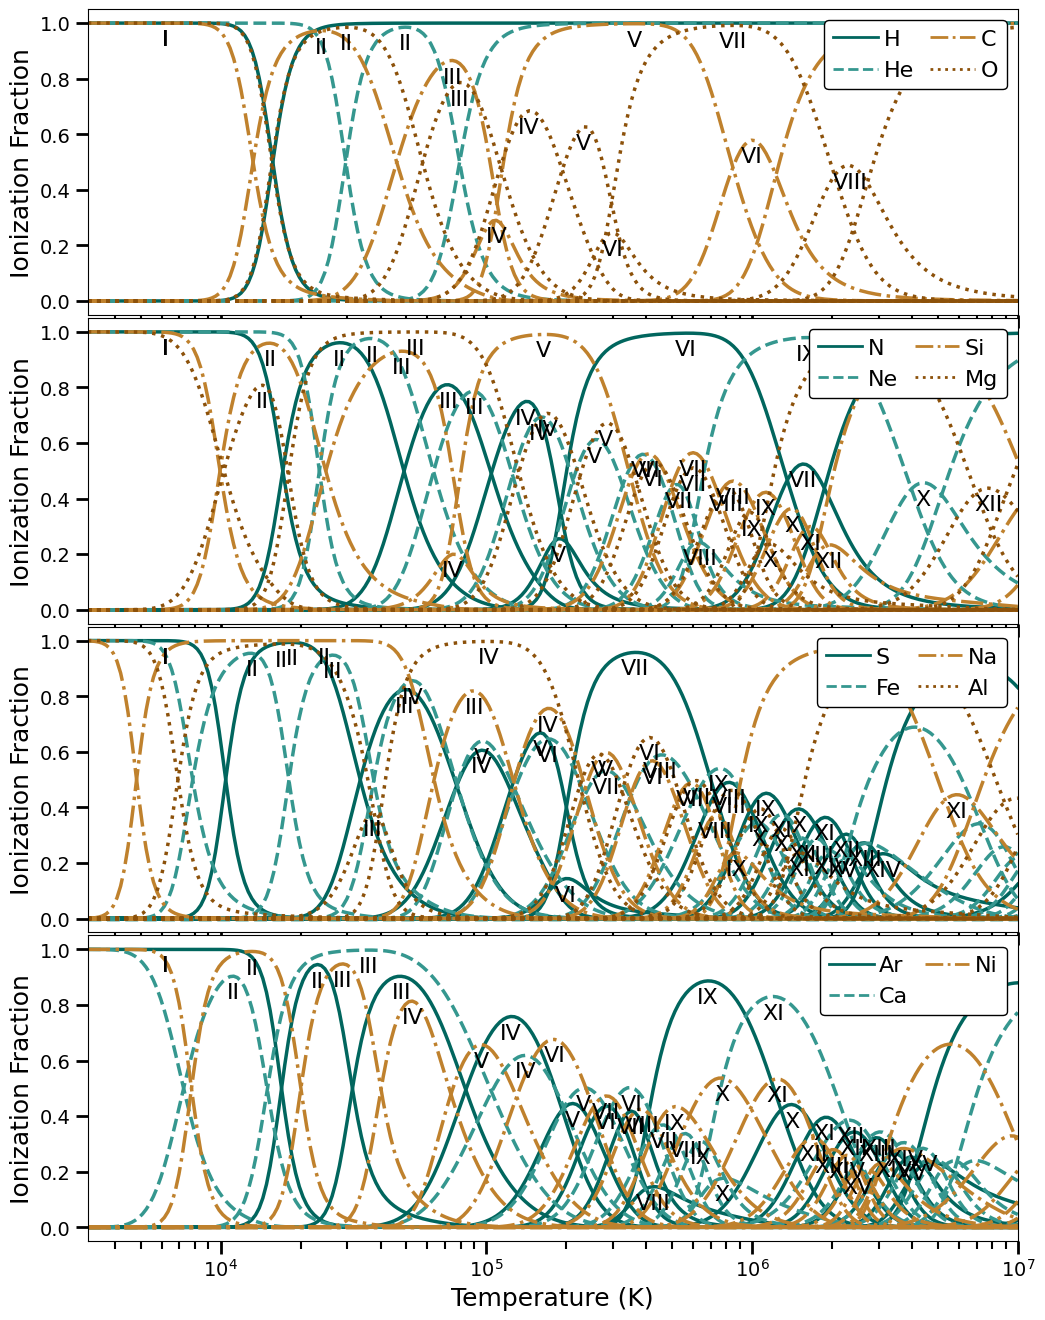

In [9]:
import matplotlib as mpl
from matplotlib.lines import Line2D
temp = np.logspace(3.5, 7, 256)
Nele = len(elements)

fig, axs = plt.subplots(nrows=4, ncols=1, sharex = True, gridspec_kw={'hspace':0.01}, figsize=(12,16))
custom_lines = []
eles = []
iplot = 0
colorsEle = ['#01665e', '#35978f', '#bf812d', '#8c510a']
linestyles = ['-', '--', '-.', ':']
numerals=['I','II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 
          'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX', 'XXI', 'XXII', 'XXIII', 'XXIV',
         'XXV', 'XXVI', 'XXVII', 'XXVIII', 'XXIX', 'XXX']
for (i,el) in enumerate(elements):
    k = int(i/4)
    icol = 1 #int(k%2)
    irow = int(k/4)
    ieq = ch.ioneq(el)
    tmp = ieq.calculate(temp)
    equils = ieq.Ioneq
    
    eles.append(el.capitalize())
    custom_lines.append(Line2D([0],[0], color=colorsEle[i%4], linestyle=linestyles[i%4], lw=2)) #plt.cm.Set2(float(i%8)/8.)))
    for (j, eq) in enumerate(equils):
        axs[k].semilogx(temp, eq, linewidth=2.5, linestyle=linestyles[i%4], color=colorsEle[i%4])# color=plt.cm.Set2(float(i%8)/8.))
        locmax = np.argmax(eq)
        coords = (temp[locmax], eq[locmax]-0.08)
        if(j == 0):
            coords = (coords[0] + 3E3, coords[1])
        if (temp[locmax] <= 0.8*max(temp)) and (j < 15):
            axs[k].annotate(numerals[j], xy=coords, xytext=coords, xycoords='data', ha='center', fontsize=16, weight='roman')
        
    iplot += 1
    if (iplot%4 == 0) or (iplot == 15):
        #'#f0f0ff'
        axs[k].legend(custom_lines, eles, loc=1, ncol=2, facecolor='w', columnspacing=0.75,
                      handletextpad=0.25, edgecolor='k', framealpha=1.0, fontsize=16)
        eles = []
        custom_lines = []
        
for ax in axs:
    ax.set_xlim(temp[0], temp[-1])
    ax.set_ylabel("Ionization Fraction", fontsize=18)
    ax.tick_params(which='major', axis='both', labelsize=14, length=9, width=2)
    ax.tick_params(which='minor', axis='both', length=6, width=1.5)
                   
axs[-1].set_xlabel("Temperature (K)", fontsize=18)

fig.savefig("ion_balance.pdf", bbox_inches='tight')
plt.show()